<a href="https://colab.research.google.com/github/daaaanish17/Implementing-CNN/blob/main/Implementing_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [10]:
import numpy as np
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [18]:
train_images.shape

(50000, 32, 32, 3)

Normalize pixel values to be between 0 and 1

In [11]:
train_images, test_images = train_images/255.0, test_images/255.0 

Verify the data


To verify that the dataset looks correct, let's plot the first 5 images from the training set and display the class name below each image:

In [14]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

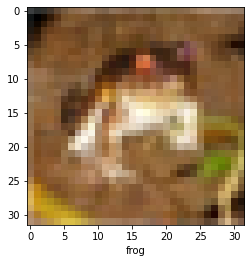

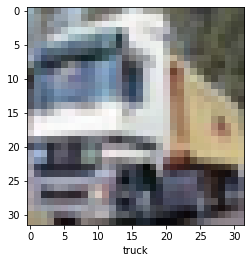

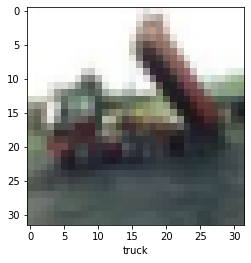

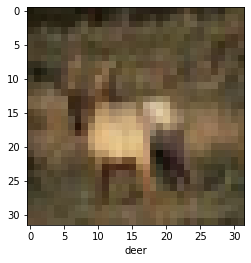

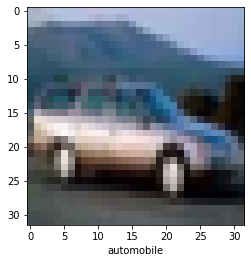

In [17]:
for i in range(5):
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
  plt.show()

Creating CNN

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

Display the architecture of model

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Adding Dense layers

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Compile and train the model

In [27]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels))

Epoch 1/3
1563/1563 [==============================] - 90s 57ms/step - loss: 0.7816 - accuracy: 0.7263 - val_loss: 0.8894 - val_accuracy: 0.6921
Epoch 2/3
1563/1563 [==============================] - 81s 52ms/step - loss: 0.7326 - accuracy: 0.7407 - val_loss: 0.8487 - val_accuracy: 0.7064
Epoch 3/3
1563/1563 [==============================] - 85s 54ms/step - loss: 0.6760 - accuracy: 0.7617 - val_loss: 0.8385 - val_accuracy: 0.7118


Evaluate the model

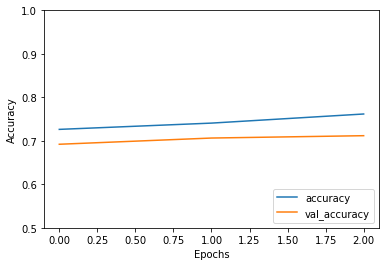

In [32]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [33]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 5s - loss: 0.8385 - accuracy: 0.7118 - 5s/epoch - 15ms/step


In [34]:
print(test_acc)

0.7117999792098999
